### Background: what is an artifact?
Artifacts are signal interference that can be endogenous (biological) and exogenous (environmental). Typical biological artifacts are **head movements, eye blinks or eye movements, heart beats**. The most common environmental artifact is due to the **power line**, the so-called line noise.

### How to handle artifacts?
- MNE deals with artifacts by first identifying them, and subsequently removing them.


For how to correct artifacts by rejection see Rejecting bad data (channels and segments). To discover how to correct certain artifacts by filtering see Filtering and resampling data and to learn how to correct artifacts with subspace methods like SSP and ICA see Artifact Correction with SSP and Artifact Correction with ICA.

### Artifacts Detection

In [2]:
import numpy as np
import mne
from mne.datasets import sample
from mne.preprocessing import create_ecg_epochs,create_eog_epochs

In [3]:
# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'

In [4]:
raw = mne.io.read_raw_fif(raw_fname,preload=True)

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


#### Low frequency drifts and line noise

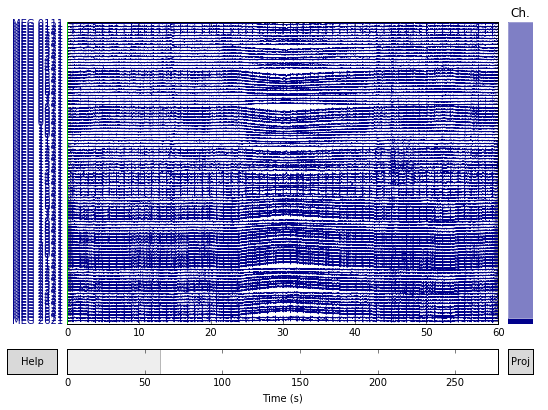

In [7]:
## apply_proj: Apply the signal space projection (SSP) operators to the data.
## del_proj([idx]): Remove SSP projection vector.

raw.copy().pick_types(meg='mag').del_proj(0).plot(duration=60, n_channels=100, remove_dc=False);

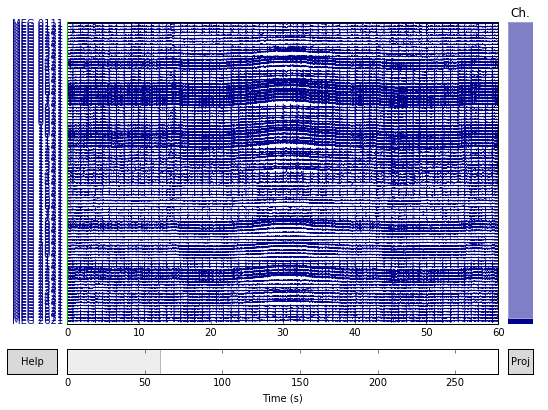

In [12]:
raw.copy().pick_types(meg='mag').del_proj(1).plot(duration=60, n_channels=100, remove_dc=False);

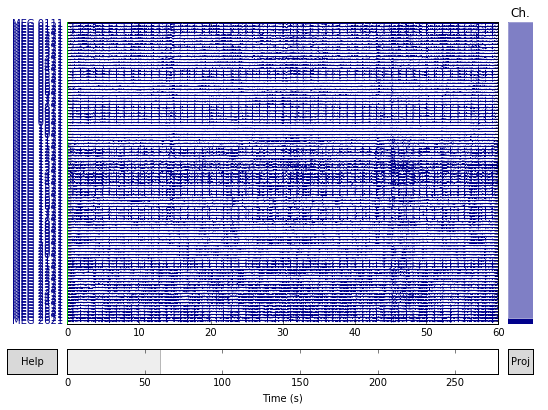

In [8]:
raw.copy().pick_types(meg='mag').plot(duration=60, n_channels=100, remove_dc=False);

#### we see high amplitude undulations in low frequencies, spanning across tens of seconds

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


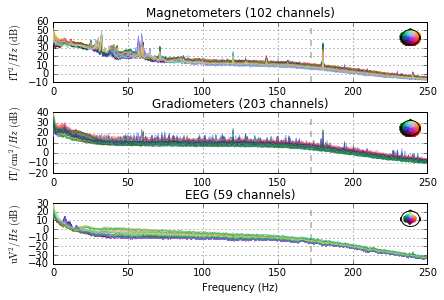

In [13]:
raw.plot_psd(tmax=np.inf,fmax=250); #Plot the power spectral density across channels.

On MEG sensors we see narrow frequency peaks at 60, 120, 180, 240 Hz, related to line noise. But also some high amplitude signals between 25 and 32 Hz, hinting at other biological artifacts such as ECG. These can be most easily detected in the time domain using MNE helper functions
See [Filtering and resampling data.](https://martinos.org/mne/stable/auto_tutorials/plot_artifacts_correction_filtering.html#sphx-glr-auto-tutorials-plot-artifacts-correction-filtering-py)

### Removinfg power-line noise 
- https://martinos.org/mne/stable/auto_tutorials/plot_artifacts_correction_filtering.html#sphx-glr-auto-tutorials-plot-artifacts-correction-filtering-py

Setting up band-stop filter
Filter length of 3965 samples (6.602 sec) selected


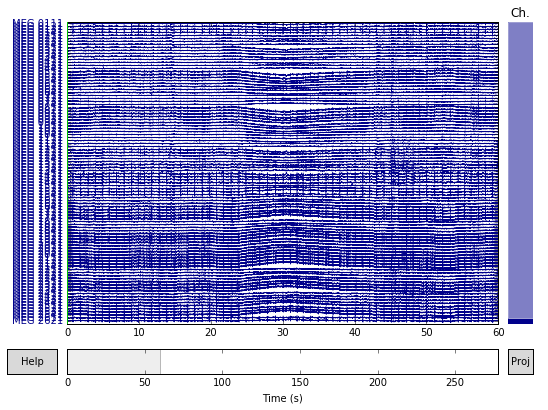

In [17]:
raw.copy().pick_types(meg='mag').notch_filter(np.arange(60, 241, 60),filter_length='auto',phase='zero').del_proj(0).plot(duration=60, n_channels=100, remove_dc=False);

Setting up band-stop filter
Filter length of 3965 samples (6.602 sec) selected
Effective window size : 3.410 (s)


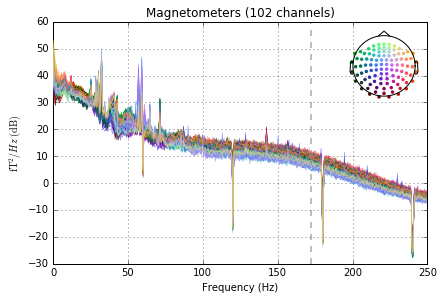

In [18]:
raw.copy().pick_types(meg='mag').notch_filter(np.arange(60, 241, 60),filter_length='auto',phase='zero').plot_psd(tmax=np.inf,fmax=250);

### ECG
- finds ECG events, creates epochs, averages and plots

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz
Filter length of 8192 samples (13.639 sec) selected
Number of ECG events detected : 283 (average pulse 61 / min.)
283 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 283 events and 601 original time points ...
0 bad epochs dropped
We found 283 ECG events


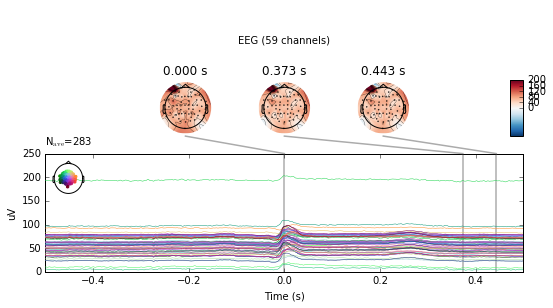

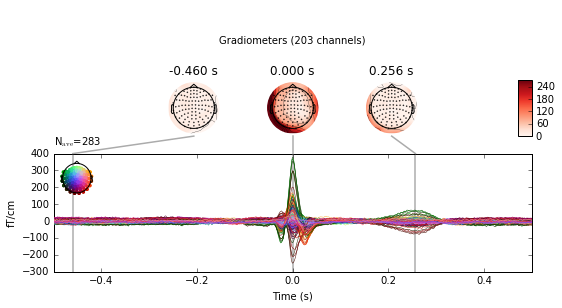

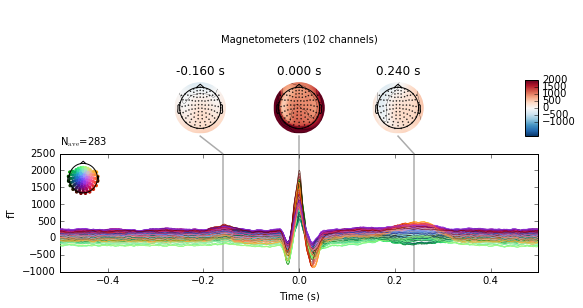

In [23]:
average_ecg = create_ecg_epochs(raw).average()
print('We found %i ECG events' % average_ecg.nave)
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
average_ecg.plot_joint(**joint_kwargs);

### EOG

EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 2 - 45 Hz
Filter length of 8192 samples (13.639 sec) selected
Setting up band-pass filter from 1 - 10 Hz
Filter length of 8192 samples (13.639 sec) selected
Now detecting blinks and generating corresponding events
Number of EOG events detected : 46
46 matching events found
No baseline correction applied
Not setting metadata
Created an SSP operator (subspace dimension = 3)
Loading data for 46 events and 601 original time points ...
0 bad epochs dropped
We found 46 EOG events


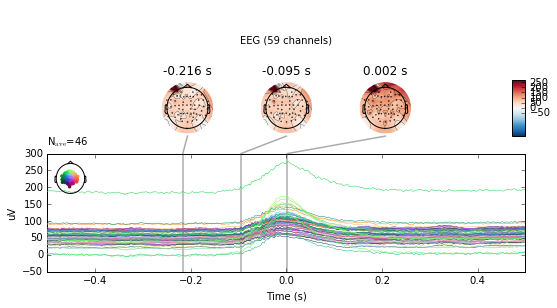

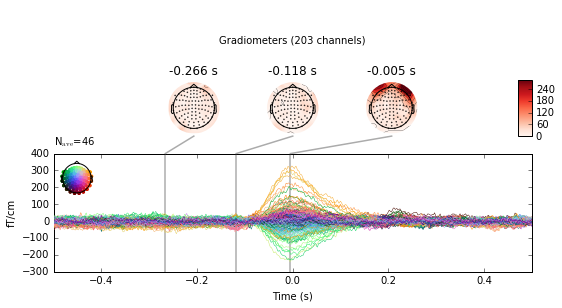

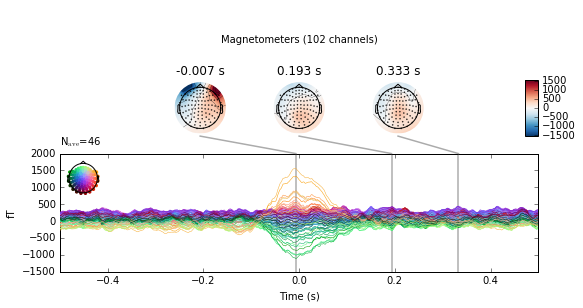

In [24]:
average_eog = create_eog_epochs(raw).average()
print('We found %i EOG events' % average_eog.nave)
average_eog.plot_joint(**joint_kwargs);

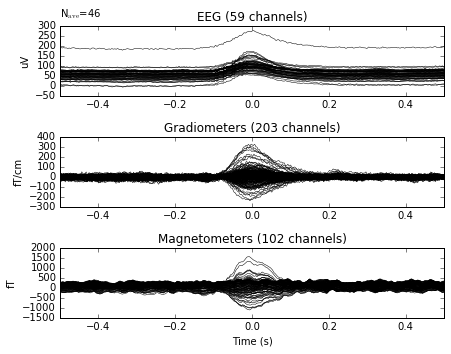

In [27]:
average_eog.plot();

#### Reference
- https://martinos.org/mne/stable/auto_tutorials/plot_artifacts_detection.html